In [3]:
pip install pandas matplotlib numpy seaborn statsmodels geopandas fuzzywuzzy folium 



SyntaxError: invalid syntax (2161019908.py, line 1)

# Load Datasets

In [1]:
import geopandas as gpd
bogota_crime_gdf = gpd.read_file("../data/DAILoc.geojson")
bogota_crime_gdf.head(20)

,CMIULOCAL,CMNOMLOCAL,CMMES,CMH18CONT,CMH19CONT,CMH20CONT,CMHVAR,CMHTOTAL,CMLP18CONT,CMLP19CONT,...,CMHA24CONT,CMHB24CONT,CMHCE24CON,CMHM24CONT,CMHC24CONT,CMDS24CONT,CMVI24CONT,SHAPE_AREA,SHAPE_LEN,geometry
0,09,Fontibón,Ene-Jul (2023vs2024),7.0,13.0,11.0,15.79,638.0,658.0,522.0,...,80.0,280.0,1214.0,109.0,297.0,123.0,1992.0,0.002710,0.321915,"MULTIPOLYGON (((-74.15857 4.66274, -74.15848 4..."
1,19,Ciudad Bolívar,Ene-Jul (2023vs2024),134.0,103.0,110.0,1.72,638.0,1342.0,1425.0,...,199.0,107.0,724.0,382.0,161.0,553.0,3188.0,0.010585,0.702136,"MULTIPOLYGON (((-74.21092 4.38691, -74.21114 4..."
2,02,Chapinero,Ene-Jul (2023vs2024),6.0,7.0,3.0,20.00,638.0,529.0,367.0,...,31.0,104.0,1889.0,40.0,454.0,205.0,751.0,0.003095,0.333966,"MULTIPOLYGON (((-74.01116 4.66459, -74.01154 4..."
3,20,Sumapaz,Ene-Jul (2023vs2024),0.0,0.0,1.0,-100.00,638.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063549,1.914949,"MULTIPOLYGON (((-74.20584 4.26966, -74.20584 4..."
4,18,Rafael Uribe Uribe,Ene-Jul (2023vs2024),38.0,35.0,53.0,-39.13,638.0,970.0,927.0,...,161.0,62.0,574.0,178.0,167.0,284.0,1515.0,0.001126,0.174513,"MULTIPOLYGON (((-74.12803 4.59254, -74.12777 4..."
5,17,Candelaria,Ene-Jul (2023vs2024),2.0,1.0,2.0,0.00,638.0,132.0,158.0,...,4.0,11.0,221.0,6.0,97.0,52.0,143.0,0.000168,0.067158,"MULTIPOLYGON (((-74.06621 4.60317, -74.0662 4...."
6,12,Barrios Unidos,Ene-Jul (2023vs2024),7.0,2.0,5.0,-6.25,638.0,487.0,342.0,...,76.0,167.0,907.0,75.0,261.0,92.0,713.0,0.000969,0.121180,"MULTIPOLYGON (((-74.05725 4.68684, -74.06249 4..."
7,13,Teusaquillo,Ene-Jul (2023vs2024),2.0,3.0,4.0,-33.33,638.0,557.0,270.0,...,72.0,137.0,1363.0,74.0,253.0,239.0,666.0,0.001156,0.148314,"MULTIPOLYGON (((-74.09372 4.66607, -74.09332 4..."
8,16,Puente Aranda,Ene-Jul (2023vs2024),12.0,18.0,32.0,50.00,638.0,824.0,578.0,...,209.0,102.0,785.0,132.0,323.0,132.0,523.0,0.001410,0.161116,"MULTIPOLYGON (((-74.1183 4.63741, -74.11504 4...."
9,14,Los Mártires,Ene-Jul (2023vs2024),40.0,38.0,32.0,-21.43,638.0,660.0,353.0,...,65.0,63.0,776.0,74.0,346.0,606.0,3596.0,0.000530,0.099382,"MULTIPOLYGON (((-74.07283 4.61542, -74.07311 4..."


# Data Catalog
https://oaiee.scj.gov.co/agc/rest/services/Tematicos_Pub/CifrasSCJ/FeatureServer/0

## Exploratory Data Analyses

In [2]:


# List of years to normalize
total_theft_from_persons = ['CMNOMLOCAL','CMIULOCAL','CMHP18CONT', 'CMHP19CONT', 'CMHP20CONT', 'CMHP21CONT', 'CMHP22CONT', 'CMHP23CONT']
bogota_crime_gdf[total_theft_from_persons].head(100)

,CMNOMLOCAL,CMIULOCAL,CMHP18CONT,CMHP19CONT,CMHP20CONT,CMHP21CONT,CMHP22CONT,CMHP23CONT
0,Fontibón,09,3356.0,4385.0,2903.0,3546.0,8970.0,5001.0
1,Ciudad Bolívar,19,1744.0,2322.0,1935.0,2827.0,5345.0,4201.0
2,Chapinero,02,5484.0,7514.0,3357.0,4079.0,11451.0,8844.0
3,Sumapaz,20,0.0,0.0,0.0,0.0,0.0,0.0
4,Rafael Uribe Uribe,18,1807.0,2265.0,1640.0,2197.0,4536.0,3281.0
5,Candelaria,17,887.0,972.0,475.0,530.0,1194.0,625.0
6,Barrios Unidos,12,2470.0,3056.0,1903.0,2303.0,5368.0,4200.0
7,Teusaquillo,13,3812.0,4550.0,2295.0,2659.0,7392.0,6631.0
8,Puente Aranda,16,2527.0,3163.0,2318.0,2944.0,6508.0,4201.0
9,Los Mártires,14,2313.0,2979.0,1816.0,2269.0,5224.0,3875.0


   year  theft_from_persons  theft_from_residences  theft_from_vehicles
0  2018             58008.0                 6087.0               2070.0
1  2019             71438.0                 5894.0               2108.0
2  2020             46633.0                 4475.0               1716.0
3  2021             58120.0                 4519.0               1999.0
4  2022            132629.0                 3527.0               4026.0


C:\Users\HP\AppData\Local\Temp\ipykernel_22524\1435594676.py:102: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_loc.set_xticklabels(ax_loc.get_xticklabels(), rotation=90)


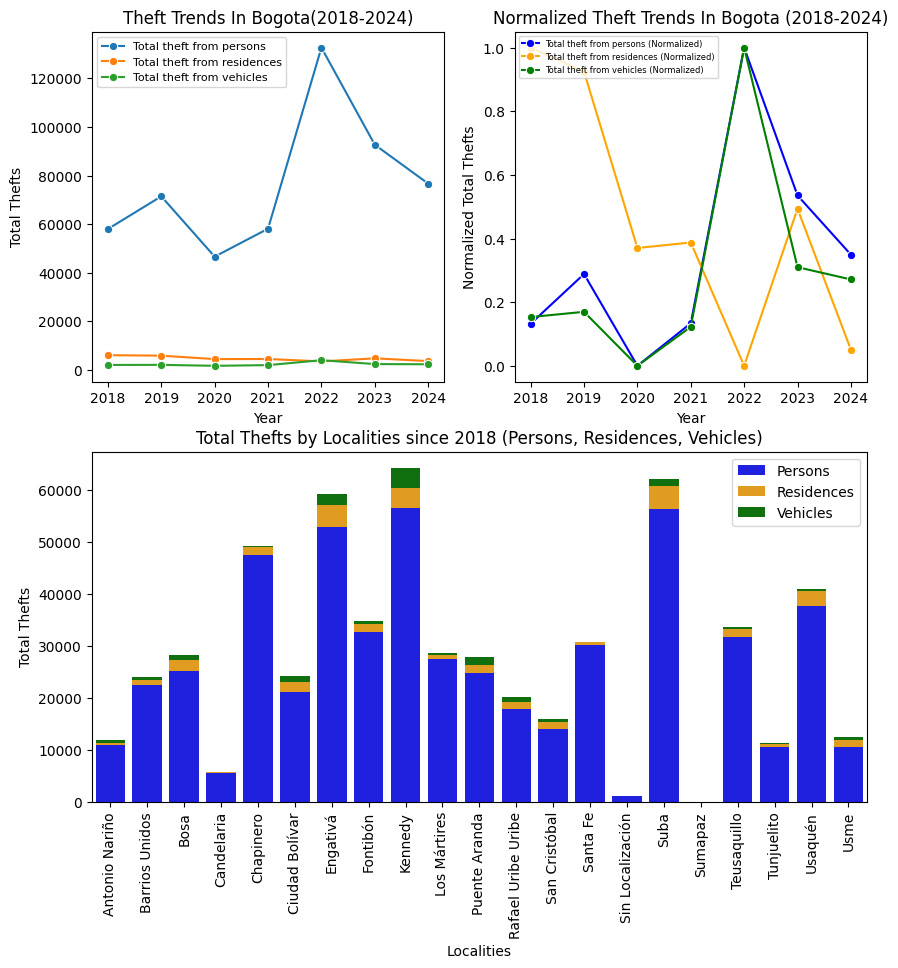

<Figure size 1000x600 with 0 Axes>

In [17]:

from pandas import DataFrame

# Create a new DataFrame from a dictionmary

# Create a new DataFrame from a dictionary where 
result = {
        'year': [2018, 2019, 2020, 2021, 2022, 2023, 2024],
        'theft_from_persons': [bogota_crime_gdf['CMHP18CONT'].sum(),
                               bogota_crime_gdf['CMHP19CONT'].sum(),
                               bogota_crime_gdf['CMHP20CONT'].sum(),
                               bogota_crime_gdf['CMHP21CONT'].sum(),
                               bogota_crime_gdf['CMHP22CONT'].sum(),
                               bogota_crime_gdf['CMHP23CONT'].sum(),
                               bogota_crime_gdf['CMHP24CONT'].sum()],
         'theft_from_residences': [bogota_crime_gdf['CMHR18CONT'].sum(),
                               bogota_crime_gdf['CMHR19CONT'].sum(),
                               bogota_crime_gdf['CMHR20CONT'].sum(),
                               bogota_crime_gdf['CMHR21CONT'].sum(),
                               bogota_crime_gdf['CMHR22CONT'].sum(),
                               bogota_crime_gdf['CMHR23CONT'].sum(),
                               bogota_crime_gdf['CMHR24CONT'].sum()],
         'theft_from_vehicles': [bogota_crime_gdf['CMHA18CONT'].sum(),
                               bogota_crime_gdf['CMHA19CONT'].sum(),
                               bogota_crime_gdf['CMHA20CONT'].sum(),
                               bogota_crime_gdf['CMHA21CONT'].sum(),
                               bogota_crime_gdf['CMHA22CONT'].sum(),
                               bogota_crime_gdf['CMHA23CONT'].sum(),
                               bogota_crime_gdf['CMHA24CONT'].sum()],
         
}   

df= DataFrame(result)
print(df.head())

# create a lineplot using seaborn
import seaborn as sns   
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# use sns lineplot to create a lineplot of the data where axis x is year and axis y is theft_from_persons



fig = plt.figure(figsize=(10, 10))  
gs = gridspec.GridSpec(2, 2)
ax_evolution = fig.add_subplot(gs[0, 0])


sns.lineplot(data=df,x='year',y='theft_from_persons',marker='o', label='Total theft from persons',ax= ax_evolution)
sns.lineplot(data=df,x='year',y='theft_from_residences',marker='o', label='Total theft from residences',ax= ax_evolution)
sns.lineplot(data=df,x='year',y='theft_from_vehicles',marker='o', label='Total theft from vehicles',ax= ax_evolution)

ax_evolution.legend(loc='upper left', prop={'size': 8})
ax_evolution.set_ylabel('Total Thefts')
ax_evolution.set_xlabel('Year')
ax_evolution.set_title('Theft Trends In Bogota(2018-2024)')

# Create DataFrame
df = DataFrame(result)
# Normalize the data for each theft type
df['theft_from_persons_normalized'] = (df['theft_from_persons'] - df['theft_from_persons'].min()) / (df['theft_from_persons'].max() - df['theft_from_persons'].min())
df['theft_from_residences_normalized'] = (df['theft_from_residences'] - df['theft_from_residences'].min()) / (df['theft_from_residences'].max() - df['theft_from_residences'].min())
df['theft_from_vehicles_normalized'] = (df['theft_from_vehicles'] - df['theft_from_vehicles'].min()) / (df['theft_from_vehicles'].max() - df['theft_from_vehicles'].min())


ax_normalizedevolution = fig.add_subplot(gs[0, 1])
sns.lineplot(data=df, x='year', y='theft_from_persons_normalized', marker='o', label='Total theft from persons (Normalized)', color='blue', ax=ax_normalizedevolution)
sns.lineplot(data=df, x='year', y='theft_from_residences_normalized', marker='o', label='Total theft from residences (Normalized)', color='orange', ax=ax_normalizedevolution)
sns.lineplot(data=df, x='year', y='theft_from_vehicles_normalized', marker='o', label='Total theft from vehicles (Normalized)', color='green',ax=ax_normalizedevolution)

ax_normalizedevolution.legend(loc='upper left', prop={'size': 6})
ax_normalizedevolution.set_ylabel('Normalized Total Thefts')
ax_normalizedevolution.set_xlabel('Year')
ax_normalizedevolution.set_title('Normalized Theft Trends In Bogota (2018-2024)')


ax_loc = fig.add_subplot(gs[1, :])  # Span the entire second row

theft_by_region = bogota_crime_gdf.groupby('CMNOMLOCAL').agg({
    'CMHP18CONT': 'sum', 'CMHP19CONT': 'sum', 'CMHP20CONT': 'sum', 'CMHP21CONT': 'sum',
    'CMHP22CONT': 'sum', 'CMHP23CONT': 'sum', 'CMHP24CONT': 'sum',
    'CMHR18CONT': 'sum', 'CMHR19CONT': 'sum', 'CMHR20CONT': 'sum', 'CMHR21CONT': 'sum',
    'CMHR22CONT': 'sum', 'CMHR23CONT': 'sum', 'CMHR24CONT': 'sum',
    'CMHA18CONT': 'sum', 'CMHA19CONT': 'sum', 'CMHA20CONT': 'sum', 'CMHA21CONT': 'sum',
    'CMHA22CONT': 'sum', 'CMHA23CONT': 'sum', 'CMHA24CONT': 'sum'
}).reset_index()


theft_by_region['total_theft_from_persons'] = theft_by_region[['CMHP18CONT', 'CMHP19CONT', 'CMHP20CONT', 'CMHP21CONT', 'CMHP22CONT', 'CMHP23CONT', 'CMHP24CONT']].sum(axis=1)
theft_by_region['total_theft_from_residences'] = theft_by_region[['CMHR18CONT', 'CMHR19CONT', 'CMHR20CONT', 'CMHR21CONT', 'CMHR22CONT', 'CMHR23CONT', 'CMHR24CONT']].sum(axis=1)
theft_by_region['total_theft_from_vehicles'] = theft_by_region[['CMHA18CONT', 'CMHA19CONT', 'CMHA20CONT', 'CMHA21CONT', 'CMHA22CONT', 'CMHA23CONT', 'CMHA24CONT']].sum(axis=1)

# Plot total theft by region
plt.figure(figsize=(10, 6))
sns.barplot(data=theft_by_region, x='CMNOMLOCAL', y='total_theft_from_persons', color='blue', label='Persons',ax=ax_loc)
sns.barplot(data=theft_by_region, x='CMNOMLOCAL', y='total_theft_from_residences', color='orange', label='Residences', bottom=theft_by_region['total_theft_from_persons'],ax=ax_loc)
sns.barplot(data=theft_by_region, x='CMNOMLOCAL', y='total_theft_from_vehicles', color='green', label='Vehicles', bottom=theft_by_region['total_theft_from_persons'] + theft_by_region['total_theft_from_residences'],ax=ax_loc)

ax_loc.set_xlabel('Localities')
ax_loc.set_ylabel('Total Thefts')
ax_loc.set_title('Total Thefts by Localities since 2018 (Persons, Residences, Vehicles)')
ax_loc.set_xticklabels(ax_loc.get_xticklabels(), rotation=90)
plt.show()


In [25]:
pip install prophet


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   -------------------- ------------------- 6.8/13.3 MB 32.3 MB/s eta 0:00:01
   ---------------------------------------  13.1/13.3 MB 35.8 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 31.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 26.1 MB/s eta 0:00:00


In [26]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Example data (replace with actual time series data)
data = {
    'year': [2018, 2019, 2020, 2021, 2022, 2023],
    'total_thefts': [bogota_crime_gdf['CMHP18CONT'].sum() + bogota_crime_gdf['CMHR18CONT'].sum() + bogota_crime_gdf['CMHA18CONT'].sum(),
                     bogota_crime_gdf['CMHP19CONT'].sum() + bogota_crime_gdf['CMHR19CONT'].sum() + bogota_crime_gdf['CMHA19CONT'].sum(),
                     bogota_crime_gdf['CMHP20CONT'].sum() + bogota_crime_gdf['CMHR20CONT'].sum() + bogota_crime_gdf['CMHA20CONT'].sum(),
                     bogota_crime_gdf['CMHP21CONT'].sum() + bogota_crime_gdf['CMHR21CONT'].sum() + bogota_crime_gdf['CMHA21CONT'].sum(),
                     bogota_crime_gdf['CMHP22CONT'].sum() + bogota_crime_gdf['CMHR22CONT'].sum() + bogota_crime_gdf['CMHA22CONT'].sum(),
                     bogota_crime_gdf['CMHP23CONT'].sum() + bogota_crime_gdf['CMHR23CONT'].sum() + bogota_crime_gdf['CMHA23CONT'].sum()]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Rename the columns as required by Prophet: 'ds' for date, 'y' for value
df['ds'] = pd.to_datetime(df['year'], format='%Y')
df['y'] = df['total_thefts']

# Initialize Prophet model
model = Prophet()

# Fit the model on the data
model.fit(df[['ds', 'y']])

# Create a future dataframe to predict next 5 years (2024-2028)
future = model.make_future_dataframe(periods=5, freq='Y')

# Make the forecast
forecast = model.predict(future)

# Plot the forecast including the confidence intervals
fig = model.plot(forecast)
plt.title('Forecasted Theft Trends in Bogotá (2018-2028)')
plt.xlabel('Year')
plt.ylabel('Total Thefts')
plt.show()


c:\Users\HP\OneDrive\Documents\Eduardo Toledo\ASAI\ai4good_public_health\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


AttributeError: `np.float_` was removed in the NumPy 2.0 release. Use `np.float64` instead.

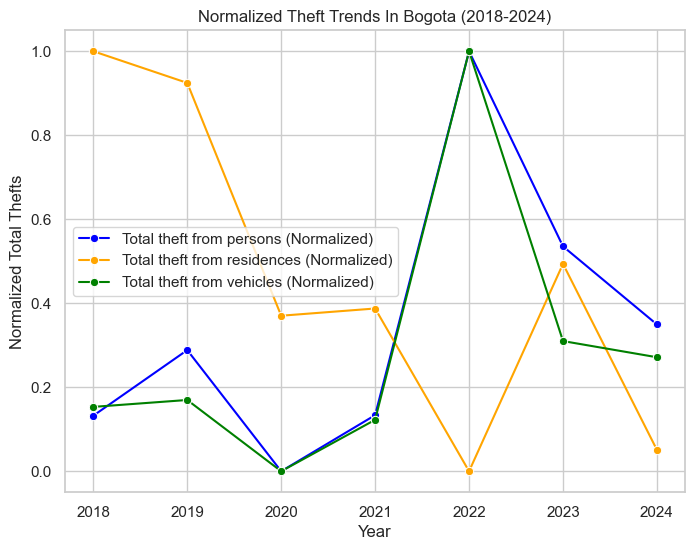

In [50]:
from pandas import DataFrame
import seaborn as sns   
import matplotlib.pyplot as plt

# Create a DataFrame from a dictionary
result = {
    'year': [2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'theft_from_persons': [bogota_crime_gdf['CMHP18CONT'].sum(),
                           bogota_crime_gdf['CMHP19CONT'].sum(),
                           bogota_crime_gdf['CMHP20CONT'].sum(),
                           bogota_crime_gdf['CMHP21CONT'].sum(),
                           bogota_crime_gdf['CMHP22CONT'].sum(),
                           bogota_crime_gdf['CMHP23CONT'].sum(),
                           bogota_crime_gdf['CMHP24CONT'].sum()],
    'theft_from_residences': [bogota_crime_gdf['CMHR18CONT'].sum(),
                              bogota_crime_gdf['CMHR19CONT'].sum(),
                              bogota_crime_gdf['CMHR20CONT'].sum(),
                              bogota_crime_gdf['CMHR21CONT'].sum(),
                              bogota_crime_gdf['CMHR22CONT'].sum(),
                              bogota_crime_gdf['CMHR23CONT'].sum(),
                              bogota_crime_gdf['CMHR24CONT'].sum()],
    'theft_from_vehicles': [bogota_crime_gdf['CMHA18CONT'].sum(),
                            bogota_crime_gdf['CMHA19CONT'].sum(),
                            bogota_crime_gdf['CMHA20CONT'].sum(),
                            bogota_crime_gdf['CMHA21CONT'].sum(),
                            bogota_crime_gdf['CMHA22CONT'].sum(),
                            bogota_crime_gdf['CMHA23CONT'].sum(),
                            bogota_crime_gdf['CMHA24CONT'].sum()],
}

# Create DataFrame
df = DataFrame(result)

# Normalize the data for each theft type
df['theft_from_persons_normalized'] = (df['theft_from_persons'] - df['theft_from_persons'].min()) / (df['theft_from_persons'].max() - df['theft_from_persons'].min())
df['theft_from_residences_normalized'] = (df['theft_from_residences'] - df['theft_from_residences'].min()) / (df['theft_from_residences'].max() - df['theft_from_residences'].min())
df['theft_from_vehicles_normalized'] = (df['theft_from_vehicles'] - df['theft_from_vehicles'].min()) / (df['theft_from_vehicles'].max() - df['theft_from_vehicles'].min())

# Create the line plot
plt.figure(figsize=(8, 6))

# Plot normalized values for each category of theft
sns.lineplot(data=df, x='year', y='theft_from_persons_normalized', marker='o', label='Total theft from persons (Normalized)', color='blue')
sns.lineplot(data=df, x='year', y='theft_from_residences_normalized', marker='o', label='Total theft from residences (Normalized)', color='orange')
sns.lineplot(data=df, x='year', y='theft_from_vehicles_normalized', marker='o', label='Total theft from vehicles (Normalized)', color='green')

# Add labels and title
plt.ylabel('Normalized Total Thefts')
plt.xlabel('Year')
plt.title('Normalized Theft Trends In Bogota (2018-2024)')

# Show the legend
plt.legend()

# Show the plot
plt.show()


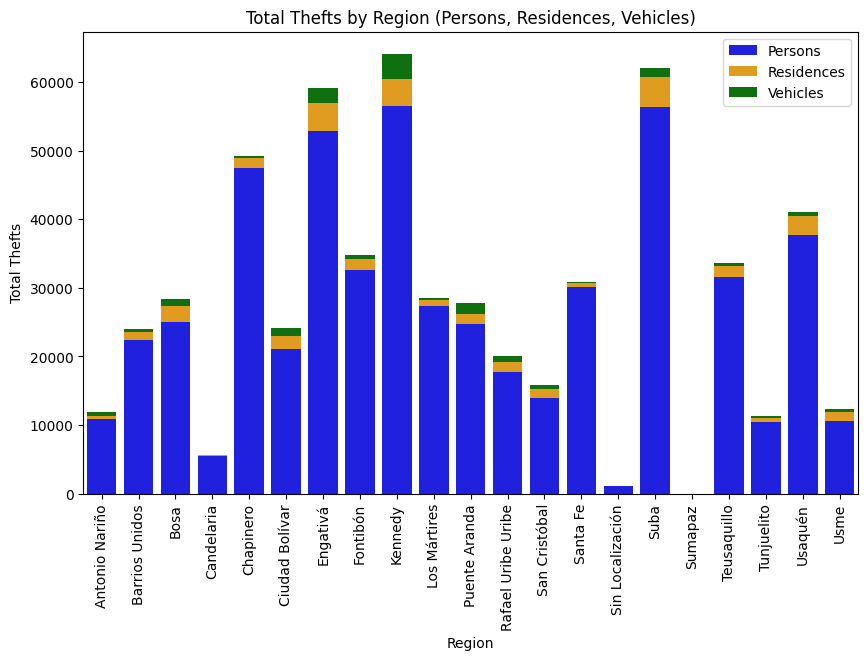

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



theft_by_region = bogota_crime_gdf.groupby('CMNOMLOCAL').agg({
    'CMHP18CONT': 'sum', 'CMHP19CONT': 'sum', 'CMHP20CONT': 'sum', 'CMHP21CONT': 'sum',
    'CMHP22CONT': 'sum', 'CMHP23CONT': 'sum', 'CMHP24CONT': 'sum',
    'CMHR18CONT': 'sum', 'CMHR19CONT': 'sum', 'CMHR20CONT': 'sum', 'CMHR21CONT': 'sum',
    'CMHR22CONT': 'sum', 'CMHR23CONT': 'sum', 'CMHR24CONT': 'sum',
    'CMHA18CONT': 'sum', 'CMHA19CONT': 'sum', 'CMHA20CONT': 'sum', 'CMHA21CONT': 'sum',
    'CMHA22CONT': 'sum', 'CMHA23CONT': 'sum', 'CMHA24CONT': 'sum'
}).reset_index()


theft_by_region['total_theft_from_persons'] = theft_by_region[['CMHP18CONT', 'CMHP19CONT', 'CMHP20CONT', 'CMHP21CONT', 'CMHP22CONT', 'CMHP23CONT', 'CMHP24CONT']].sum(axis=1)
theft_by_region['total_theft_from_residences'] = theft_by_region[['CMHR18CONT', 'CMHR19CONT', 'CMHR20CONT', 'CMHR21CONT', 'CMHR22CONT', 'CMHR23CONT', 'CMHR24CONT']].sum(axis=1)
theft_by_region['total_theft_from_vehicles'] = theft_by_region[['CMHA18CONT', 'CMHA19CONT', 'CMHA20CONT', 'CMHA21CONT', 'CMHA22CONT', 'CMHA23CONT', 'CMHA24CONT']].sum(axis=1)

# Plot total theft by region
plt.figure(figsize=(10, 6))
sns.barplot(data=theft_by_region, x='CMNOMLOCAL', y='total_theft_from_persons', color='blue', label='Persons')
sns.barplot(data=theft_by_region, x='CMNOMLOCAL', y='total_theft_from_residences', color='orange', label='Residences', bottom=theft_by_region['total_theft_from_persons'])
sns.barplot(data=theft_by_region, x='CMNOMLOCAL', y='total_theft_from_vehicles', color='green', label='Vehicles', bottom=theft_by_region['total_theft_from_persons'] + theft_by_region['total_theft_from_residences'])


plt.xlabel('Localities')
plt.ylabel('Total Thefts')
plt.title('Total Thefts by Localities since 2018 (Persons, Residences, Vehicles)')
plt.xticks(rotation=90)  
plt.legend()
plt.show()
